캐글 신용카드 거래내용이 포함된 데이터 셋을 아래 사이트에서 다운받아 다음 사항을 수행하세요.

https://www.kaggle.com/mlg-ulb/creditcardfraud

데이터 설명<br>
데이터 세트에는 유럽 카드 소지자가 2013년 9월에 신용 카드로 거래한 내용이 포함되어 있습니다.
이 데이터 세트는 284,807건의 거래 중 492건의 사기가 발생한 이틀 동안 발생한 거래를 보여줍니다. 데이터 세트는 매우 불균형하며 긍정적 클래스(사기)는 모든 거래의 0.172%를 차지합니다.

여기에는 PCA 변환의 결과인 숫자 입력 변수만 포함됩니다. 안타깝게도 기밀 문제로 인해 데이터에 대한 원래 기능과 추가 배경 정보를 제공할 수 없습니다. 기능 V1, V2, … V28은 PCA로 얻은 주요 구성 요소이며 PCA로 변환되지 않은 유일한 기능은 '시간'과 '양'입니다. 기능 '시간'에는 각 트랜잭션과 데이터 세트의 첫 번째 트랜잭션 사이에 경과된 초가 포함됩니다. 'Amount' 기능은 거래 금액이며, 이 기능은 예제 종속 비용에 민감한 학습에 사용할 수 있습니다. 기능 'Class'는 응답 변수이며 사기의 경우 값 1, 그렇지 않은 경우 0을 취합니다.

- 데이터 전처리 후 로지스틱 리그레션을 적용한 모델 학습 및 평가(정확도, 정밀도, 재현율, F1 score, AUC)
- Amount 피처를 정규분포 및 로그 변환 후 모델 학습 및 평가
- 상관성이 높은 피처 한개를 선택하여 이상치 데이터 제거 후 모델 학습 및 평가
- SMOTE 오버 샘플링 적용 후 모델 학습 및 평가
- SMOTE 적용 시 인사이트 요약

##### 오버 샘플링
- SMOTE 
    - 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식

In [1]:
# SMOTE를 구현할 패키지
!pip install imbalanced-learn

### 분석 프로세스

1. 데이터 뜯어보기

2. 학습용/테스트용 데이터 나누기

3. 데이터 전처리 후 모델 학습/예측/평가

  3-1. 데이터 분포도 변환

  3-2. 이상치 데이터 제거

4. 결과


In [2]:
1. 데이터 뜯어보기

SyntaxError: invalid syntax (Temp/ipykernel_22912/1135595807.py, line 1)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df=pd.read_csv('./dataset/creditcard.csv')
display(card_df.head(5))
display(card_df.shape)
display(card_df.columns)

# 데이터는 284807행, 31열로 이루어져 있고 칼럼 중 Class는 1이 사기이고 0이 정상 데이터를 뜻하는 target 값이고
# Amount 피처는 신용카드 사용 금액을 의미합니다.
# Time 피처는 의미가 없는 피처임으로 삭제해도 될 것 같습니다.
# V1~V28 피처는 의미를 알 수 없습니다. 개인정보에 관련된 피처 같습니다.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# 결측치를 살펴보겠습니다.
print('결측치')
print(card_df.isna().sum())
# 결측치가 없는 깔끔한 데이터입니다.

결측치
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# 데이터의 구조를 살펴봤으니 Class 피처와 Amount 피처에 대해 자세히 알아보겠습니다.
print('클래스 값 분포')
print(card_df.iloc[:,-1].value_counts())  # card_df.iloc[:,-1] -> class열을 의미함 그것의 구성요소 -> value_counts() 
# 클래스 값들이 상당히 불균형한 형태  why? 당연히 사기인 데이터에 비해 정상인 데이터가 많기 때문입니다.

클래스 값 분포
0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Amount', ylabel='Density'>

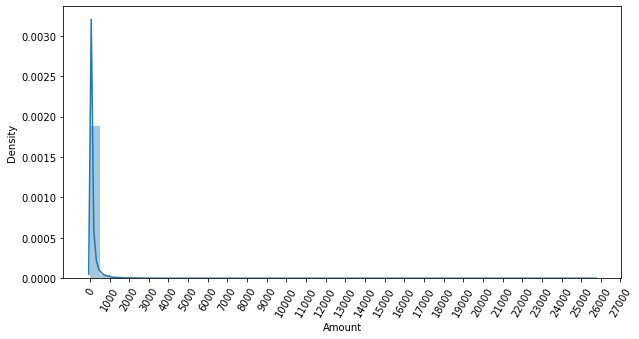

In [9]:
# Amount 피처를 살펴보겠습니다.
import seaborn as sns
plt.figure(figsize=(10,5))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])
# 카드 사용 금액이 0에서 1000달러 이하인 데이터가 대부분입니다. 
# 신용 카드로 10만원 이상 쓰는 사람이 많지 않아 보입니다.

In [ ]:
2. 학습용/테스트용 데이터 나누기

In [10]:
# 데이터를 뜯어봤으니 학습과 예측을 위해 데이터를 학습용과 테스트용으로 나눠야 합니다.
# 이때, 불균형한 데이터이기 때문에 Stratified 방식으로 나눠야 Class의 분포가 균등하게 나눠질 수 있습니다.
# 데이터의 원본을 유지한 채로 데이터를 전처리하고 나누기 위해 get_preprocessed_df 와 get_train_test_dataset 함수를 만들어 진행하였습니다.  
from sklearn.model_selection import train_test_split

# 데이터 전처리 함수 -> Time drop
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

# 데이터를 학습용과 테스트용으로 나누는 함수 
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1] # 독립변수에 Class 빼고 전체 열
    y_target = df_copy.iloc[:,-1] # 종속변수에 Class열만 선택
    X_train,X_test,y_train,y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

# 테스트 세트를 전체의 30%가 되도록 나누었고 나누어진 target값의 비율은 위와 같습니다.
# Straified 방식으로 나누었기에 매우 적었던 Class 값이 1인 데이터가 학습 데이터와 테스트 데이터에 
# 0.172%와 0.173%로 큰 차이 없이 잘 분할된 것을 확인할 수 있습니다.

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [ ]:
3. 데이터 전처리 후 모델 학습/예측/평가

In [11]:
# 각 데이터 전처리 후 모델의 예측 성능 평가를 매번 할 것이기 때문에
# get_model_train_eval() 함수를 만들어 중복되는 작업을 편리하게 하도록 하였습니다.
# 평가는 정확도, 정밀도, 재현율, f1 스코어, roc-auc 스코어를 통해 진행하였습니다.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    
def get_model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)
    pred = model.predict(feature_test)
    pred_proba = model.predict_proba(feature_test)[:,1] # Class 예측값을 pred_proba에 담기
    
    confusion = confusion_matrix(target_test, pred)
    accuracy = accuracy_score(target_test, pred)
    precision = precision_score(target_test, pred)
    recall = recall_score(target_test, pred)
    f1 = f1_score(target_test, pred)
    roc_auc = roc_auc_score(target_test, pred_proba)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [12]:
# 데이터 전처리 후의 성능을 비교해보기 위해 원본 데이터를 모델을 학습시키고 예측하고 모델의 예측 성능을 평가해보겠습니다.
# 모델은 분류에 대표적으로 쓰이는 로지스틱 회귀 모델과 앙상블 방법인 LightGBM 모델을 사용하였습니다.  
 
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from lightgbm import LGBMClassifier # LightGBM

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)
# 로지스틱 회귀보다 LightGBM 성능이 좋게 나옴

로지스틱 회귀 성능
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081, F1: 0.7171, AUC: 0.9597
LightGBM 성능
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


In [ ]:
3-1. 데이터 분포도 변환
# 데이터 세트에서 Amount 피처의 값이 한쪽에 쏠려있는 상당히 불균형한 분포를 가지고 있었기 때문에
# 이러한 분포를 StandardScaler를 통해 정규 분포 형태로 변환해서 평가해보고,
# 데이터 분포도가 많이 왜곡되어 있을 경우 적용하는 중요 기법 중 하나인 로그 변환을 통해 변환하여 평가해보겠습니다

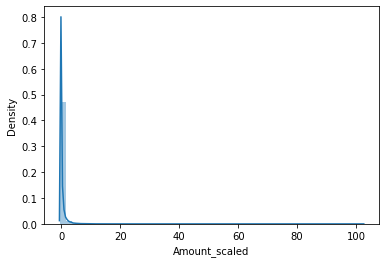

In [13]:
# 정규화
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler=StandardScaler()
    amount_StandardScaled=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) # fit_transform하려면 2차원 변환
    df_copy.insert(0,'Amount_scaled',amount_StandardScaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

# Amount 피처값이 0에서 26000이 아닌 0에서 100으로 분포가 많이 줄어들었고
# 분포의 형태는 스케일링 전의 분포와 많이 유사한 것을 볼 수 있습니다.

In [14]:
# Amount 피처값이 스케일링된 데이터 세트로 모델을 학습시키고 예측하고 모델의 예측 성능을 평가해보겠습니다. 
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)

# Amout 피처값을 정규화 한 데이터 세트를 이용한 모델의 성능은 원본 데이터를 이용한 모델에 비해 성능이 개선되지 않았음을 확인할 수 있습니다.

로지스틱 회귀 성능
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702
LightGBM 성능
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC: 0.9779


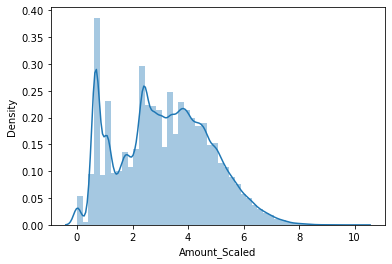

In [15]:
# 로그 변환
def get_preprocessed_df(df):
    df_copy=df.copy()
    amount_log_Scaled=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_log_Scaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_Scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df) 

In [16]:
lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)
# Amount 피처값을 로그 변환한 데이터 세트를 이용한 모델의 성능은 원본 데이터를 이용한 모델에 비해 성능이 약간씩 개선되었음을 확인할 수 있습니다.

로지스틱 회귀 성능
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC: 0.9727
LightGBM 성능
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.9796


In [ ]:
3-2. 이상치 데이터 제거
# 이상치 데이터란 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터를 말합니다.
# 이상치 데이터는 머신러닝 모델의 성능을 저하시킬 가능성이 높습니다
# 이상치를 찾는 방법 중 대표적인 방법은 IQR 방법입니다
# IQR은 사분위 값의 편차를 이용하는 기법입니다.
# 사분위는 전체 데이터를 값이 높은 순으로 정렬하고 이를 Q1(25%), Q2(50%), Q3(75%), Q4(100%)로 4등분한 것을 말합니다.
# 여기서 IQR이란 Q1 ~ Q3 구간을 뜻합니다.
# 이상치 데이터는 IQR에 1.5를 곱해서 생성된 범위를 벗어난 데이터를 말합니다.
# 즉, Q1-(IQR*1.5) 에서 Q3+(IQR*1.5) 구간을 벗어나면 이상치 데이터로 간주합니다.

<AxesSubplot:>

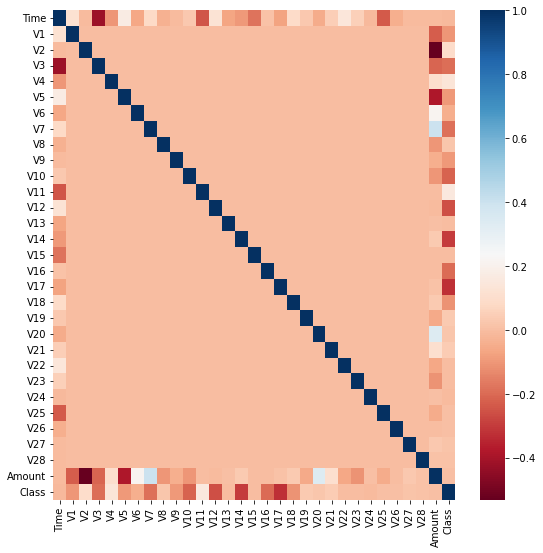

In [17]:
# 이상치 데이터를 제거하기 위해 먼저 어떤 피처의 이상치 데이터를 제거할 것인지가 필요합니다.
# target값과 가장 상관성이 높은 피처들을 위주로 이상치를 제거하는 것이 좋습니다.
# 피처들의 상관도를 히트맵을 통해 알아보겠습니다.
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')
# 맨 아래줄을 보면 Class와 다른 피처들의 상관관계를 볼 수가 있는데
# 음의 상관관계가 가장 높은 피처인 V14와 V17에 대해서 이상치를 검출하고 제거해 보겠습니다. 

In [18]:
import numpy as np

def get_outlier(df,column,weight=1.5):
    fraud=df[df['Class']==1][column]
    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    iqr=quantile_75-quantile_25
    iqr_weighted=iqr*weight
    lowest_val=quantile_25-iqr_weighted
    highest_val=quantile_75+iqr_weighted
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

outlier_index_V14=get_outlier(card_df,'V14',1.5)
print('V14 이상치 데이터 인덱스: ',outlier_index_V14)
outlier_index_V17=get_outlier(card_df,'V17',1.5)
print('V17 이상치 데이터 인덱스: ',outlier_index_V17)
# V14의 이상치 데이터는 총 4개가 나왔고 V17은 나오지 않았습니다.

V14 이상치 데이터 인덱스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')
V17 이상치 데이터 인덱스:  Int64Index([], dtype='int64')


In [19]:
# V14의 이상치를 제거하고 모델에 적용하여 모델을 평가해보겠습니다.
def get_preprocessed_df(df):
    df_copy=df.copy()
    amount_log_Scaled=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_log_Scaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    outlier_index_V14=get_outlier(df_copy,'V14',1.5)
    df_copy.drop(outlier_index_V14,axis=0,inplace=True)
    return df_copy

print('V14 이상치 제거')
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test, y_train, y_test)
# 전체적으로 성능이 많이 개선된 것을 볼 수 있는데 재현율이 로지스틱 회귀는 약 67%, LightGBM은 약 83%로 많이 개선된 것을 확인할 수 있습니다.

V14 이상치 제거
로지스틱 회귀 성능
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
LightGBM 성능
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


### 인싸이트
- 불균형한 분포를 가진 피처를 로그 변환을 통해 불균형한 분포를 감소시켜주고 target값과 상관관계가 높은 피처의 이상치 데이터를 제거한 결과가 가장 좋게 나왔습니다.
- 재현율에서 상당히 큰 성능 개선을 볼 수 있습니다.
- 사기 적발 모델의 경우 실제 사기인 경우(1) 을 정상(0) 이라고 판단하게 되면 큰 문제가 발생할 수 있기 때문에 재현율이 중요한 지표로 사용됩니다.
    - 양성을 양성으로 판단하는 평가지표 -> 재현율 TP/(TP/FN)
    
이번 실습을 통해 데이터를 분석하고 전처리한 후 데이터에 맞는 머신러닝 알고리즘을 이용하여 학습, 예측, 성능 평가하는 전반적인 과정에 대해 이해할 수 있었습니다. 

In [ ]:
# SMOTE사용해보기

In [ ]:
smote를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적이며, 좋은 smote 패키지일수록 재현율은 개선하고 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식한다.